In [2]:
import pyperclip

In [3]:
rawPatterns = pyperclip.paste()

In [4]:
rawLstPatterns = rawPatterns.split(",")

In [5]:
rawLstPatterns[0]

'\'gcodein\': r"gcodein=(\\d+)"'

In [6]:
keyPatterns = [item.split(":")[0] for item in rawLstPatterns]

In [7]:
valuePatterns = [item.split(":")[1] for item in rawLstPatterns]

In [10]:
keyPatterns[0], valuePatterns[0]

("'gcodein'", ' r"gcodein=(\\d+)"')

In [44]:
parsedList = []

for key, value in zip(keyPatterns, valuePatterns):
    k = key.strip("'")
    v = value.strip("\'")[3:]
    parsedList.append(f"{k} = {v}")

In [45]:
pyperclip.copy("".join(parsedList))

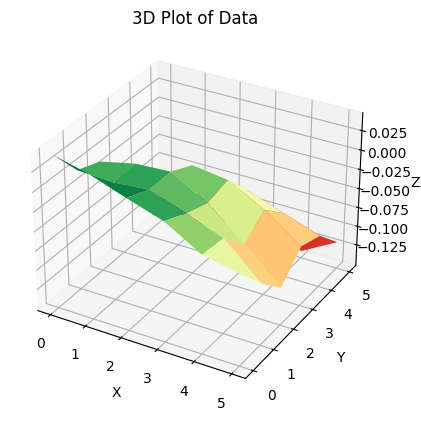

In [49]:
import numpy as np
import matplotlib.pyplot as plt

data = [
    [0.04375, 0.0325, 0.01625, 0.00125, -0.02625, -0.03625],
    [0.0025, 0.0, 0.00375, -0.0125, -0.03, -0.0725],
    [-0.00875, 0.00125, 0.00375, -0.0225, -0.06125, -0.10375],
    [-0.065, -0.03625, -0.01, -0.01625, -0.04125, -0.075],
    [-0.09625, -0.09125, -0.06375, -0.0525, -0.06875, -0.085],
    [-0.135, -0.14875, -0.13125, -0.12875, -0.14375, -0.1175]
]

data = np.array(data)

# Generate x, y coordinates
x = np.linspace(0, data.shape[1]-1, data.shape[1])
y = np.linspace(0, data.shape[0]-1, data.shape[0])
x, y = np.meshgrid(x, y)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, data, cmap='RdYlGn')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Data')

plt.show()


In [51]:
import plotly.graph_objects as go

# Your data
z = [
    [0.04375, 0.0325, 0.01625, 0.00125, -0.02625, -0.03625],
    [0.0025, 0.0, 0.00375, -0.0125, -0.03, -0.0725],
    [-0.00875, 0.00125, 0.00375, -0.0225, -0.06125, -0.10375],
    [-0.065, -0.03625, -0.01, -0.01625, -0.04125, -0.075],
    [-0.09625, -0.09125, -0.06375, -0.0525, -0.06875, -0.085],
    [-0.135, -0.14875, -0.13125, -0.12875, -0.14375, -0.1175]
]

# Create the meshgrid for x and y coordinates
x = list(range(len(z[0])))
y = list(range(len(z)))

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Interactive 3D Plot', autosize=False,
                  width=500, height=500, margin=dict(t=40, r=0, l=20, b=40))
fig.show()


In [60]:
import plotly.graph_objects as go
import plotly.offline as pyo
import numpy as np


def determine_sig_figs(value):
    """Determine the number of significant figures of a value."""
    s = str(value)
    if '.' in s:
        s = s.rstrip('0')
        s = s.split('.')[1]
        return len(s)
    return len([char for char in s if char != '0'])


# Your data
z = [
    [0.04375, 0.0325, 0.01625, 0.00125, -0.02625, -0.03625],
    [0.0025, 0.0, 0.00375, -0.0125, -0.03, -0.0725],
    [-0.00875, 0.00125, 0.00375, -0.0225, -0.06125, -0.10375],
    [-0.065, -0.03625, -0.01, -0.01625, -0.04125, -0.075],
    [-0.09625, -0.09125, -0.06375, -0.0525, -0.06875, -0.085],
    [-0.135, -0.14875, -0.13125, -0.12875, -0.14375, -0.1175]
]

# Convert data to numpy array for ease of calculation
z_np = np.array(z)

# Compute average and std
avg = np.mean(z_np)
std = np.std(z_np)

sig_figs = max(determine_sig_figs(val) for row in z for val in row)

# Round the average and std to the determined number of significant figures
avg_rounded = round(avg, sig_figs)
std_rounded = round(std, sig_figs)

# Create the meshgrid for x and y coordinates
x = list(range(len(z[0])))
y = list(range(len(z)))

# Create the 3D plot
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Interactive 3D Plot', autosize=False,
                  width=500, height=500, margin=dict(t=40, r=0, l=20, b=40))

# Save the plot as an HTML div
plot_div = pyo.plot(fig, output_type='div', include_plotlyjs=False)

# Create an HTML table for the average and std
table = f"""
<table border="1">
    <tr>
        <th>Metric</th>
        <th>Value</th>
    </tr>
    <tr>
        <td>Average</td>
        <td>{avg_rounded}</td>
    </tr>
    <tr>
        <td>Standard Deviation</td>
        <td>{std_rounded}</td>
    </tr>
</table>
"""

# Combine the 3D plot and the table in a single HTML content
html_content = f"""
<html>
    <head>
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
    </head>
    <body>
        {plot_div}
        {table}
    </body>
</html>
"""

# Save the combined HTML content to a file
with open("combined_plot.html", "w") as file:
    file.write(html_content)

print("Saved combined_plot.html")


Saved combined_plot.html
